In [9]:
##Import necessary libraries

##EDA USA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import os
low_memory=False


df_YT_US = pd.read_csv('E:/IIT-C/Sem-III/Adv Data Analytics/New folder/USvideos/USvideos.csv');



c:\users\anantharaman chandar\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Basic information of the data
print(df_YT_US.shape)



(40955, 16)


In [4]:
## Identify the uniqueness

print(df_YT_US.nunique())

video_id                   6283
trending_date               207
title                      6456
channel_title              2209
category_id                  17
publish_time               6271
tags                       6059
views                     40479
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6354
comments_disabled             6
ratings_disabled              5
video_error_or_removed        6
description                6903
dtype: int64


In [5]:
# No of Nulls
df_YT_US.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40955 entries, 0 to 40954
Data columns (total 16 columns):
video_id                  40955 non-null object
trending_date             40955 non-null object
title                     40955 non-null object
channel_title             40955 non-null object
category_id               40955 non-null int64
publish_time              40955 non-null object
tags                      40955 non-null object
views                     40955 non-null int64
likes                     40955 non-null int64
dislikes                  40955 non-null int64
comment_count             40955 non-null int64
thumbnail_link            40955 non-null object
comments_disabled         40955 non-null object
ratings_disabled          40955 non-null object
video_error_or_removed    40955 non-null object
description               40385 non-null object
dtypes: int64(5), object(11)
memory usage: 3.3+ MB


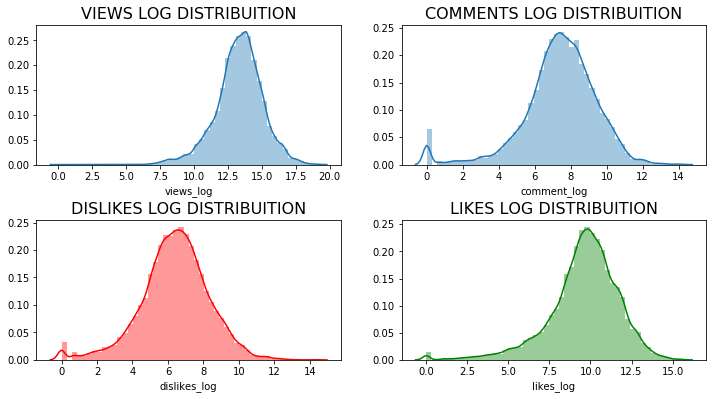

In [6]:
## Likes, comments, dislikes, views distribution

df_YT_US['likes_log'] = np.log(df_YT_US['likes'] + 1)
df_YT_US['views_log'] = np.log(df_YT_US['views'] + 1)
df_YT_US['dislikes_log'] = np.log(df_YT_US['dislikes'] + 1)
df_YT_US['comment_log'] = np.log(df_YT_US['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_YT_US['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_YT_US['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_YT_US['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_YT_US['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Category Name count
Entertainment       9965
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


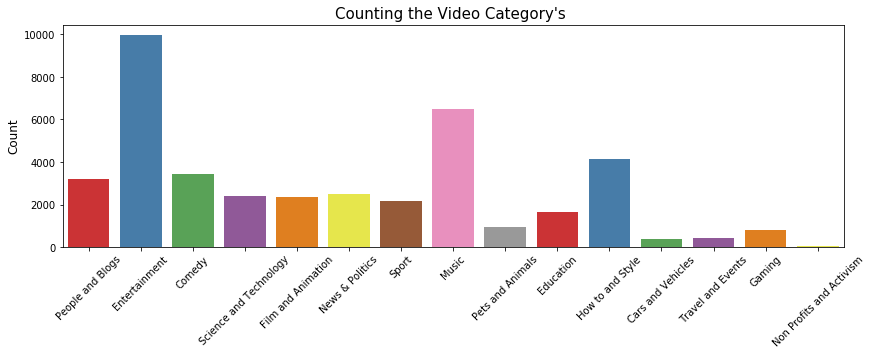

In [7]:
## Category distribution
df_YT_US['category_name'] = np.nan

df_YT_US.loc[(df_YT_US["category_id"] == 1),"category_name"] = 'Film and Animation'
df_YT_US.loc[(df_YT_US["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_YT_US.loc[(df_YT_US["category_id"] == 10),"category_name"] = 'Music'
df_YT_US.loc[(df_YT_US["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_YT_US.loc[(df_YT_US["category_id"] == 17),"category_name"] = 'Sport'
df_YT_US.loc[(df_YT_US["category_id"] == 19),"category_name"] = 'Travel and Events'
df_YT_US.loc[(df_YT_US["category_id"] == 20),"category_name"] = 'Gaming'
df_YT_US.loc[(df_YT_US["category_id"] == 22),"category_name"] = 'People and Blogs'
df_YT_US.loc[(df_YT_US["category_id"] == 23),"category_name"] = 'Comedy'
df_YT_US.loc[(df_YT_US["category_id"] == 24),"category_name"] = 'Entertainment'
df_YT_US.loc[(df_YT_US["category_id"] == 25),"category_name"] = 'News and Politics'
df_YT_US.loc[(df_YT_US["category_id"] == 26),"category_name"] = 'How to and Style'
df_YT_US.loc[(df_YT_US["category_id"] == 27),"category_name"] = 'Education'
df_YT_US.loc[(df_YT_US["category_id"] == 28),"category_name"] = 'Science and Technology'
df_YT_US.loc[(df_YT_US["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_YT_US.loc[(df_YT_US["category_id"] == 25),"category_name"] = 'News & Politics'
print("Category Name count")
print(df_YT_US.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_YT_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

In [13]:
print()